In [3]:
#Import data into data frame
import pandas as pd

business_data = pd.read_excel('/Users/peytonbailey/WGU Data Science Masters/D598-Analytics Programming/D598 Data Set.xlsx')
print(business_data.head())

   Business ID Business State  Total Long-term Debt  Total Equity  \
0     41872013       Kentucky            16889000.0    18046000.0   
1     76232013           Iowa             6252000.0    18293621.0   
2    160992013          Texas            19200000.0   177858000.0   
3    197452013       Delaware           117592000.0   278773000.0   
4    241042013       Illinois             4408000.0    52064000.0   

   Debt to Equity  Total Liabilities  Total Revenue  Profit Margin  
0        0.935886         25986000.0      136753000       0.023663  
1        0.341758         14474000.0       34226553       0.265015  
2        0.107951         72787000.0      384196000       0.130413  
3        0.421820        558749000.0      444306000       0.196768  
4        0.084665         19898000.0      121541000       0.168305  


In [4]:
# Identify and delete duplicate rows
pd.set_option('display.float_format', '{:.2f}'.format)
row_count = len(business_data)
print(row_count)
business_data = business_data.drop_duplicates()
print(business_data)
type(business_data)

150
     Business ID Business State  Total Long-term Debt  Total Equity  \
0       41872013       Kentucky           16889000.00   18046000.00   
1       76232013           Iowa            6252000.00   18293621.00   
2      160992013          Texas           19200000.00  177858000.00   
3      197452013       Delaware          117592000.00  278773000.00   
4      241042013       Illinois            4408000.00   52064000.00   
..           ...            ...                   ...           ...   
145  14733342013     California            6602000.00   38728706.00   
146  14871012013       Maryland           56000000.00  281331000.00   
147  14889172013      MInnesota            1332000.00   13926827.00   
148  15456542013         Hawaii          605500000.00 1173200000.00   
149  15528002013      MInnesota           92807000.00   78736000.00   

     Debt to Equity  Total Liabilities  Total Revenue  Profit Margin  
0              0.94        25986000.00      136753000           0.02  
1

pandas.core.frame.DataFrame

In [5]:
# Group IDs by Business State column and calculate the mean, median, max, and min values of the numerical columns
from numpy import mean, median
business_by_state= business_data.groupby('Business State')[['Total Long-term Debt', 'Total Equity', 'Debt to Equity', 'Total Liabilities', 'Total Revenue', 'Profit Margin']].agg(["mean", "median", "max", "min"])
print(business_by_state)



                Total Long-term Debt                              \
                                mean        median           max   
Business State                                                     
Alabama                 674389000.00  674389000.00 1343464000.00   
Arizona                  65088000.00   65088000.00   65088000.00   
Arkansas                 89604500.00   89604500.00  108843000.00   
California               32739642.86    4721500.00  334997000.00   
Colorado                 84700250.00   29327000.00  375322000.00   
Connecticut              18512000.00   18512000.00   18512000.00   
Delaware                 61563250.00   60165000.00  117592000.00   
Florida                  12303500.00    1809000.00   45593000.00   
Hawaii                  605500000.00  605500000.00  605500000.00   
Idaho                     2463500.00    2463500.00    4911000.00   
Illinois                 11325333.33    9029000.00   33665000.00   
Indiana                  21686000.00    5112000.

In [6]:
#Store the result as a new dataframe

business_by_state = business_by_state.reset_index()

In [7]:
#Filter data frame to identify rows with negative debt-to-equity ratios

negative_debt_equity = business_data["Debt to Equity"] < 0

business_data[negative_debt_equity]




,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin
18,934562013,Ohio,263880000.00,-111297000.00,-2.37,592174000.00,719783000,0.32
57,8343652013,Washington,10603000.00,-13271658.00,-0.80,16625000.00,8949401,0.45
87,9323722013,California,21560000.00,-15691000.00,-1.37,30048000.00,37782000,0.51
109,10919832013,Utah,2010000.00,-3602481.00,-0.56,6302000.00,17757388,0.73
117,11245242013,California,556000.00,-2063203.00,-0.27,3819000.00,1100539,-0.08
142,14535932013,Montana,16459000.00,-3842372.00,-4.28,32720000.00,33073414,0.58
143,14639722013,New York,187000.00,-13037879.00,-0.01,15900000.00,2389053,0.30


In [8]:
#Divide long-term debt by revenue for each row and save results as a new data frame called debt to income
debt_to_income = business_data["Total Long-term Debt"] / business_data["Total Revenue"]
print(debt_to_income)

0     0.12
1     0.18
2     0.05
3     0.26
4     0.04
      ... 
145   0.08
146   0.19
147   0.09
148   1.66
149   0.40
Length: 150, dtype: float64


In [29]:
#Join the debt-to-income data frame with the original data frame
business_data["Debt To Income"] = debt_to_income
print(business_data)




     Business ID Business State  Total Long-term Debt  Total Equity  \
0       41872013       Kentucky           16889000.00   18046000.00   
1       76232013           Iowa            6252000.00   18293621.00   
2      160992013          Texas           19200000.00  177858000.00   
3      197452013       Delaware          117592000.00  278773000.00   
4      241042013       Illinois            4408000.00   52064000.00   
..           ...            ...                   ...           ...   
145  14733342013     California            6602000.00   38728706.00   
146  14871012013       Maryland           56000000.00  281331000.00   
147  14889172013      MInnesota            1332000.00   13926827.00   
148  15456542013         Hawaii          605500000.00 1173200000.00   
149  15528002013      MInnesota           92807000.00   78736000.00   

     Debt to Equity  Total Liabilities  Total Revenue  Profit Margin  \
0              0.94        25986000.00      136753000           0.02   
1  

In [30]:
import matplotlib.pyplot as plt
states = business_data['Business State'].unique()
import matplotlib as mpl
color_map = mpl.colormaps['tab20']
state_colors = {state: color_map(i/len(states)) for i, state in enumerate(states)}

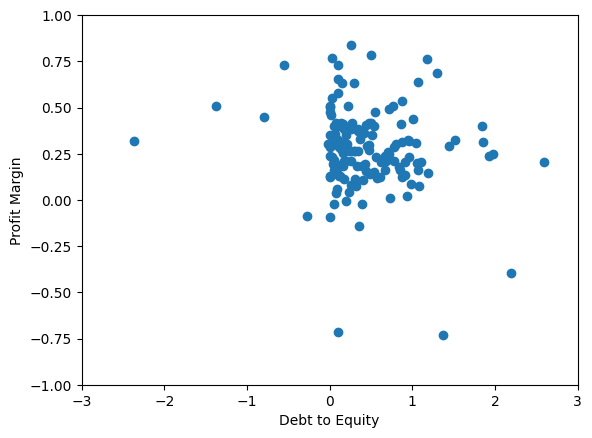

In [31]:

fig, ax = plt.subplots()
plt.scatter(business_data['Debt to Equity'], business_data['Profit Margin'])

plt.xlim(-3, 3)
plt.ylim(-1, 1)
ax.set_xlabel("Debt to Equity")
ax.set_ylabel("Profit Margin")
plt.show()

In [32]:
high_debt_equity = business_data["Debt to Equity"] > 1

business_data[high_debt_equity]


,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin,Debt To Income,State Abbrev
6,293322013,Tennessee,101759000.00,70771000.00,1.44,178095000.00,344374000,0.29,0.30,TN
12,497282013,New York,34026000.00,31994000.00,1.06,56941000.00,140946000,0.16,0.24,NY
29,3158522013,Texas,3140516000.00,2414452000.00,1.30,4884634000.00,1832253000,0.69,1.71,TX
33,3518172013,Texas,1142368000.00,1065350000.00,1.07,1633155000.00,584401000,0.64,1.95,TX
47,7668292013,California,334997000.00,321175000.00,1.04,788811000.00,276869000,0.31,1.21,CA
56,8267732013,Pennsylvania,177553000.00,11459000.00,15.49,259089000.00,471933000,0.18,0.38,PA
61,8527722013,South Carolina,165923000.00,8431000.00,19.68,287346000.00,462593000,0.28,0.36,SC
69,8804602013,New York,190454000.00,103122000.00,1.85,316482000.00,534779000,0.40,0.36,NY
70,8839452013,Arkansas,108843000.00,100538000.00,1.08,214408000.00,555005000,0.07,0.20,AR
82,9241682013,Ohio,4011000.00,2924000.00,1.37,9884000.00,9423000,-0.73,0.43,OH


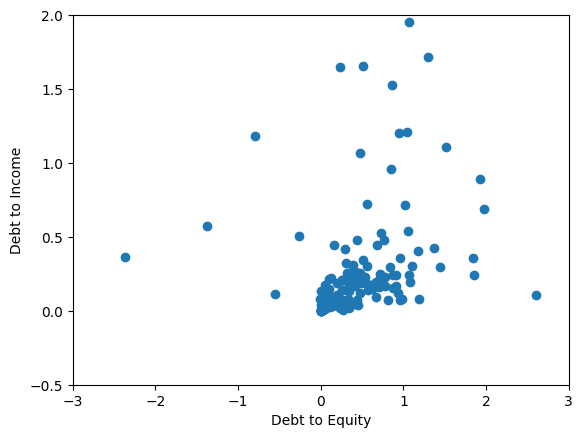

In [33]:
fig, ax = plt.subplots()
plt.scatter(business_data['Debt to Equity'], business_data['Debt To Income'])

plt.xlim(-3, 3)
plt.ylim(-.5, 2)
ax.set_xlabel("Debt to Equity")
ax.set_ylabel("Debt to Income")
plt.show()

In [34]:
average_business = business_data.groupby('Business State')[['Total Long-term Debt', 'Total Equity', 'Debt to Equity', 'Total Liabilities', 'Total Revenue', 'Profit Margin', 'Debt To Income']].mean()
print(average_business)



                 Total Long-term Debt  Total Equity  Debt to Equity  \
Business State                                                        
Alabama                  674389000.00 1441038739.50            0.35   
Arizona                   65088000.00   59153000.00            1.10   
Arkansas                  89604500.00  108242000.00            0.84   
California                32739642.86   45359816.43            0.17   
Colorado                  84700250.00  200758906.00            0.62   
Connecticut               18512000.00    4399091.00            4.21   
Delaware                  61563250.00  151442750.00            0.41   
Florida                   12303500.00   54754857.25            0.32   
Hawaii                   605500000.00 1173200000.00            0.52   
Idaho                      2463500.00  215582507.00            0.51   
Illinois                  11325333.33   67593216.83            0.24   
Indiana                   21686000.00   59908000.00            0.42   
Iowa  

In [61]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}


In [62]:
business_data['State Abbrev'] = business_data['Business State'].map(state_abbrev)


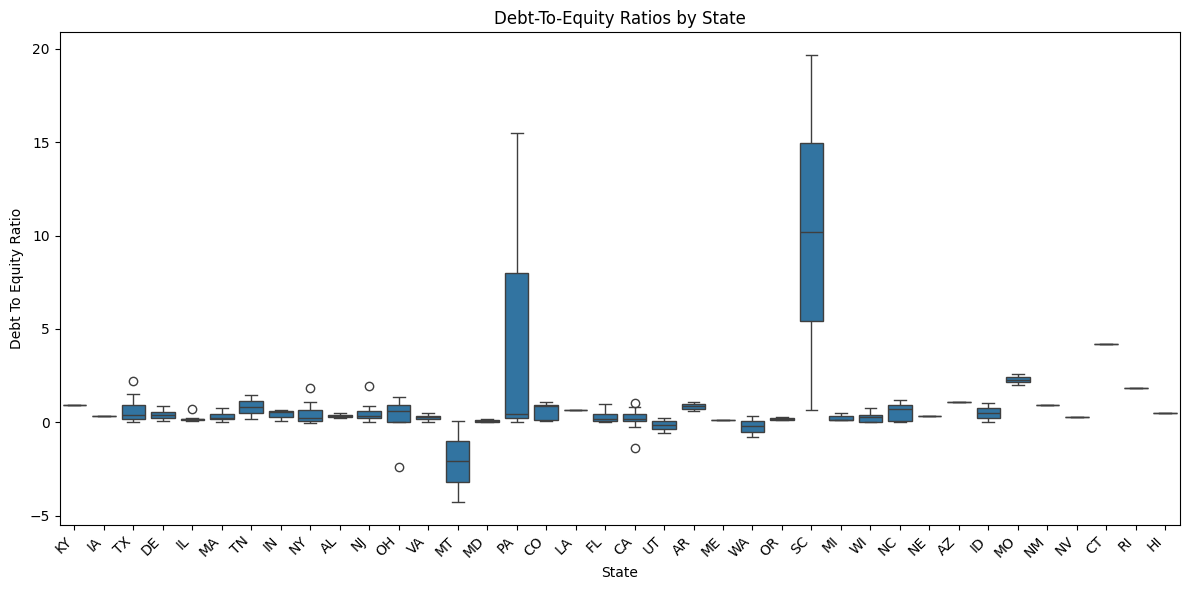

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='State Abbrev', y='Debt to Equity', data=business_data)

plt.title('Debt-To-Equity Ratios by State')
plt.xlabel('State')
plt.ylabel('Debt To Equity Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



/var/folders/5z/ygf2gykn21s37gz20p2w7pwr0000gn/T/ipykernel_18122/998898754.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20')


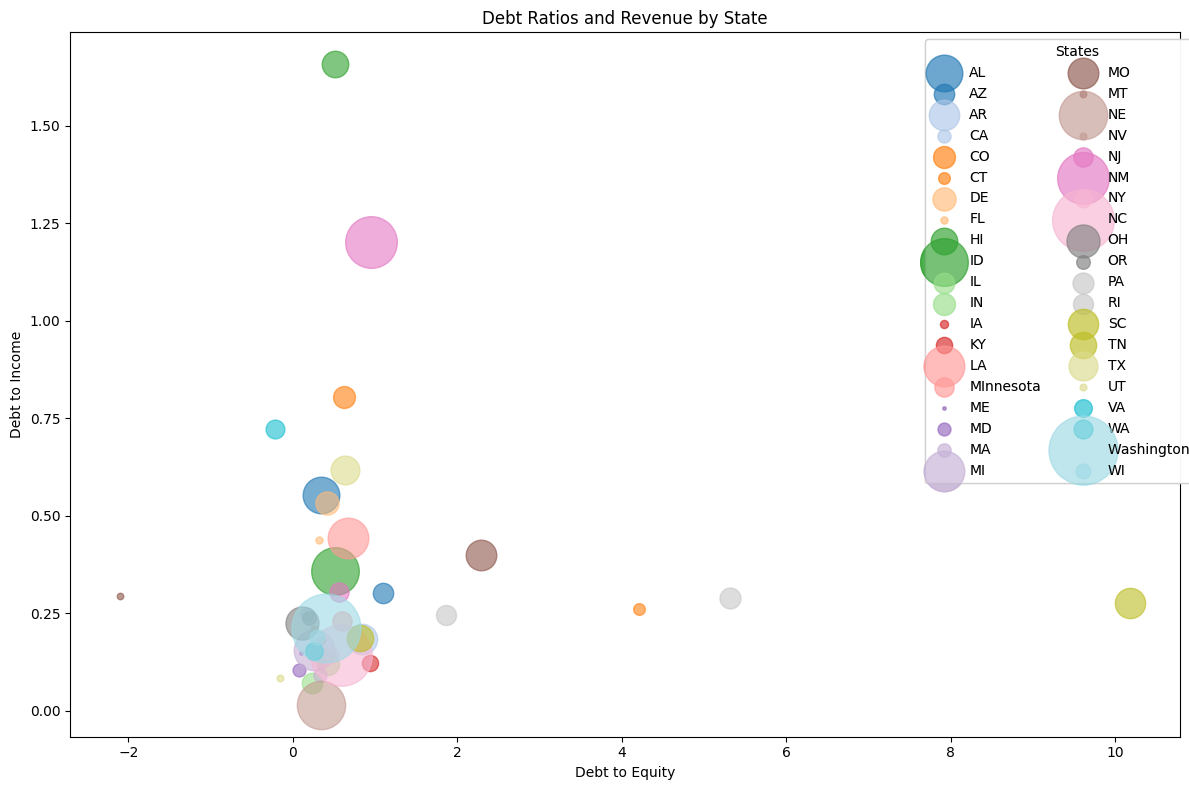

In [86]:
import matplotlib.pyplot as plt
import numpy as np
business_data['State Abbrev'] = business_data['Business State'].map(state_abbrev)


# Create a color map for states
unique_states = average_business['Business State'].unique()
color_map = plt.cm.get_cmap('tab20')
state_colors = {state: color_map(i/len(unique_states)) for i, state in enumerate(unique_states)}

# Create the bubble chart
fig, ax = plt.subplots(figsize=(12, 8))

for state in unique_states:
    state_data = average_business[average_business['Business State'] == state]
    ax.scatter(state_data['Debt to Equity'], 
               state_data['Debt To Income'],
               s=state_data['Total Revenue'] / 1e6,  # Adjust scaling factor as needed
               c=[state_colors[state]],
               alpha=0.6,
               label=state_abbrev.get(state, state))  # Use abbreviation if available

# Customize the plot
ax.set_xlabel('Debt to Equity')
ax.set_ylabel('Debt to Income')
ax.set_title('Debt Ratios and Revenue by State')

# Add a legend for states
state_legend = ax.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper right', ncol=2)
ax.add_artist(state_legend)  # Add the state legend to the plot



plt.tight_layout()
plt.show()

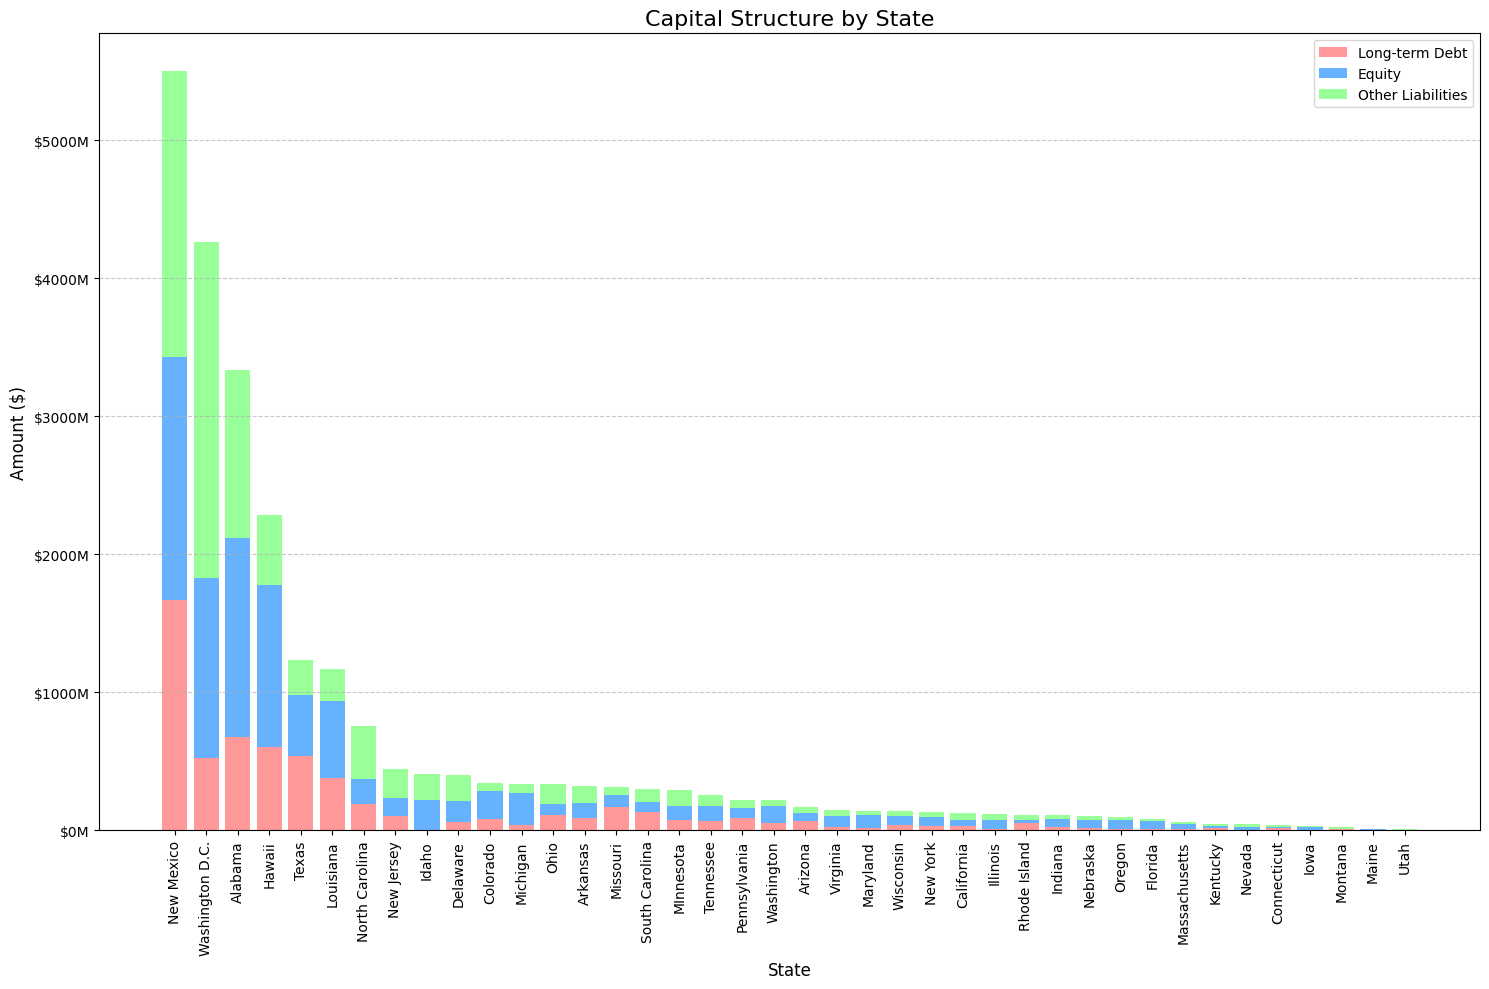

In [87]:
# Group by state and calculate mean values
state_data = business_data.groupby('Business State').agg({
    'Total Long-term Debt': 'mean',
    'Total Equity': 'mean',
    'Total Liabilities': 'mean'
}).reset_index()

# Calculate Other Liabilities
state_data['Other Liabilities'] = state_data['Total Liabilities'] - state_data['Total Long-term Debt']

# Sort states by total capital (debt + equity)
state_data['Total Capital'] = state_data['Total Long-term Debt'] + state_data['Total Equity'] + state_data['Other Liabilities']
state_data = state_data.sort_values('Total Capital', ascending=False)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(state_data['Business State'], state_data['Total Long-term Debt'], label='Long-term Debt', color='#FF9999')
ax.bar(state_data['Business State'], state_data['Total Equity'], bottom=state_data['Total Long-term Debt'], label='Equity', color='#66B2FF')
ax.bar(state_data['Business State'], state_data['Other Liabilities'], 
       bottom=state_data['Total Long-term Debt'] + state_data['Total Equity'], label='Other Liabilities', color='#99FF99')

# Customize the chart
plt.title('Capital Structure by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

# Format y-axis labels to millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

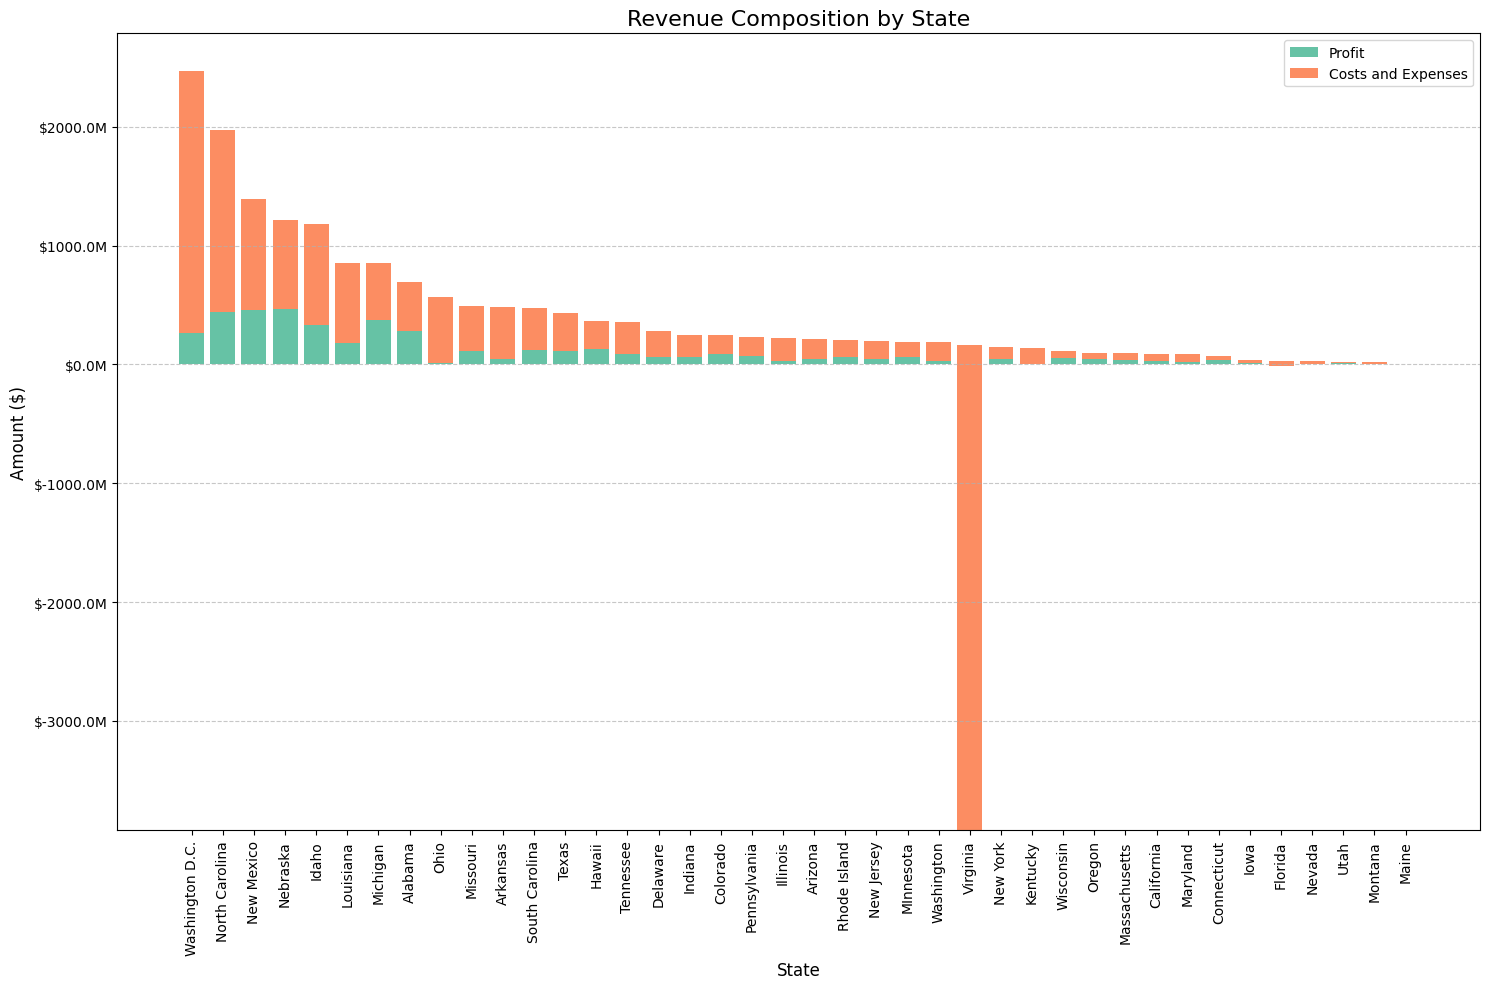

In [88]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by state and calculate mean values
state_data = business_data.groupby('Business State').agg({
    'Total Revenue': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Calculate profit and costs
state_data['Profit'] = state_data['Total Revenue'] * state_data['Profit Margin']
state_data['Costs'] = state_data['Total Revenue'] - state_data['Profit']

# Sort states by total revenue
state_data = state_data.sort_values('Total Revenue', ascending=False)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(state_data['Business State'], state_data['Profit'], label='Profit', color='#66c2a5')
ax.bar(state_data['Business State'], state_data['Costs'], bottom=state_data['Profit'], label='Costs and Expenses', color='#fc8d62')

# Customize the chart
plt.title('Revenue Composition by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

# Format y-axis labels to millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [89]:
print(type(business_by_state))

<class 'pandas.core.frame.DataFrame'>
